In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/projects/Practice/VGG16"

/content/drive/MyDrive/projects/Practice/VGG16


In [ ]:
!ls

 data							 VGG16_Cifar_3.pth
'Implementation of VGG16 in Pytorch on CIFAR 10.ipynb'	 VGG16_Cifar_4.pth
 VGG16_Cifar_0.pth					 VGG16_Cifar_5.pth
 VGG16_Cifar_10.pth					 VGG16_Cifar_6.pth
 VGG16_Cifar_11.pth					 VGG16_Cifar_7.pth
 VGG16_Cifar_1.pth					 VGG16_Cifar_8.pth
 VGG16_Cifar_2.pth					 VGG16_Cifar_9.pth


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class VGG16(nn.Module):
  def __init__(self):
    super().__init__()
    
    # First Convolutional Layers Set
    self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.conv1_1_bn = nn.BatchNorm2d(64)
    self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.conv1_2_bn = nn.BatchNorm2d(64)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Second Convolutional Layers Set
    self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.conv2_1_bn = nn.BatchNorm2d(128)
    self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.conv2_2_bn = nn.BatchNorm2d(128)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Third Convolutional Layers Set
    self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.conv3_1_bn = nn.BatchNorm2d(256)
    self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.conv3_2_bn = nn.BatchNorm2d(256)
    self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.conv3_3_bn = nn.BatchNorm2d(256)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  

    # Fourth Convolutional Layers Set
    self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv4_1_bn = nn.BatchNorm2d(512)
    self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv4_2_bn = nn.BatchNorm2d(512)
    self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv4_3_bn = nn.BatchNorm2d(512)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Fifth Convolutional Layers Set
    self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv5_1_bn = nn.BatchNorm2d(512)
    self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv5_2_bn = nn.BatchNorm2d(512)
    self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv5_3_bn = nn.BatchNorm2d(512)
    self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Fully Connected Layers
    self.fc1 = nn.Linear(in_features=512*7*7, out_features=4096)
    self.fc2 = nn.Linear(in_features=4096, out_features=4096)
    self.fc3 = nn.Linear(in_features=4096, out_features=10)

    # Dropout for preventing overfitting
    self.dropout = nn.Dropout(0.5, inplace=True)
    
    # Forward Pass
  def forward(self, x):
    x = F.relu(self.conv1_1_bn(self.conv1_1(x)))
    x = F.relu(self.conv1_2_bn(self.conv1_2(x)))
    x = self.pool1(x)

    # print(x.shape)

    x = F.relu(self.conv2_1_bn(self.conv2_1(x)))
    x = F.relu(self.conv2_2_bn(self.conv2_2(x)))
    x = self.pool2(x)

    # print(x.shape)

    x = F.relu(self.conv3_1_bn(self.conv3_1(x)))
    x = F.relu(self.conv3_2_bn(self.conv3_2(x)))
    x = F.relu(self.conv3_3_bn(self.conv3_3(x)))
    x = self.pool3(x)

    # print(x.shape)

    x = F.relu(self.conv4_1_bn(self.conv4_1(x)))
    x = F.relu(self.conv4_2_bn(self.conv4_2(x)))
    x = F.relu(self.conv4_3_bn(self.conv4_3(x)))
    x = self.pool4(x)

    # print(x.shape)

    x = F.relu(self.conv5_1_bn(self.conv5_1(x)))
    x = F.relu(self.conv5_2_bn(self.conv5_2(x)))
    x = F.relu(self.conv5_3_bn(self.conv5_3(x)))
    x = self.pool5(x)

    # print(x.shape)
    x = torch.flatten(x, 1)

    # print(x.shape)

    x = self.dropout(x)
    x = F.relu(self.fc1(x))

    # print(x.shape)

    x = self.dropout(x)
    x = F.relu(self.fc2(x))

    # print(x.shape)

    x = (self.fc3(x))

    # print(x)

    return x


In [ ]:
model = VGG16()

In [ ]:
model = model.to(device)

In [ ]:
model

VGG16(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1_bn): BatchNorm2d(256, eps

# Data Preparation of CIFAR 10 Dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
transform = transforms.Compose([
     transforms.RandomHorizontalFlip(p = 0.5),
     transforms.Resize(224),
     transforms.ToTensor(),
    ])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified


##Visualizing one Image from CIFAR 10 Train DataLoader

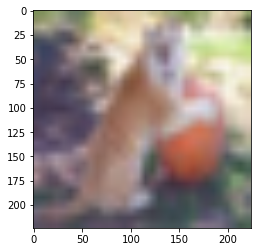

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(images[1])

##Inferencing Before Training From Model for checking Initial Accuracy

In [ ]:
model = model.to(device)

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network

        images = images

        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("Correct: ", correct)
print("Total: ", total)


Accuracy of the network on the 10000 test images: 32 %
Correct:  3292
Total:  10000


<generator object Module.parameters at 0x7f47b8076c50>


In [ ]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), momentum=0.9, weight_decay=0.0005, lr=0.01)

In [ ]:
PATH = "./VGG16_Cifar_"

num_epoch = 90

# model = model.to(device)

for epoch in range(num_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # print(loss)
        loss.backward()
        # print("I am here")
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    if (epoch % 5) == 0:
        torch.save(model.state_dict(), (PATH+str(epoch)+".pth"))
        print("saved")

print('Finished Training')

[1,   100] loss: 1.788
[1,   200] loss: 1.741
[1,   300] loss: 1.710
[1,   400] loss: 1.660
[1,   500] loss: 1.613
[1,   600] loss: 1.599
[1,   700] loss: 1.554
[1,   800] loss: 1.466
[1,   900] loss: 1.463
[1,  1000] loss: 1.448
[1,  1100] loss: 1.428
[1,  1200] loss: 1.337
[1,  1300] loss: 1.353
[1,  1400] loss: 1.316
[1,  1500] loss: 1.272
saved
[2,   100] loss: 1.199
[2,   200] loss: 1.220
[2,   300] loss: 1.162
[2,   400] loss: 1.135
[2,   500] loss: 1.106
[2,   600] loss: 1.120
[2,   700] loss: 1.083
[2,   800] loss: 1.035
[2,   900] loss: 1.059
[2,  1000] loss: 1.006
[2,  1100] loss: 0.994
[2,  1200] loss: 0.966
[2,  1300] loss: 0.916
[2,  1400] loss: 0.956
[2,  1500] loss: 0.942
[3,   100] loss: 0.908
[3,   200] loss: 0.888
[3,   300] loss: 0.872
[3,   400] loss: 0.862
[3,   500] loss: 0.853
[3,   600] loss: 0.843
[3,   700] loss: 0.860
[3,   800] loss: 0.804
[3,   900] loss: 0.806
[3,  1000] loss: 0.824
[3,  1100] loss: 0.825
[3,  1200] loss: 0.760
[3,  1300] loss: 0.791
[3,  

#Inferencing From Trained Model

In [ ]:
torch.save(model.state_dict(), (PATH+str(epoch)+".pth"))

In [ ]:
!ls

 data							 VGG16_Cifar_3.pth
'Implementation of VGG16 in Pytorch on CIFAR 10.ipynb'	 VGG16_Cifar_4.pth
 VGG16_Cifar_0.pth					 VGG16_Cifar_5.pth
 VGG16_Cifar_10.pth					 VGG16_Cifar_6.pth
 VGG16_Cifar_11.pth					 VGG16_Cifar_7.pth
 VGG16_Cifar_1.pth					 VGG16_Cifar_8.pth
 VGG16_Cifar_2.pth					 VGG16_Cifar_9.pth


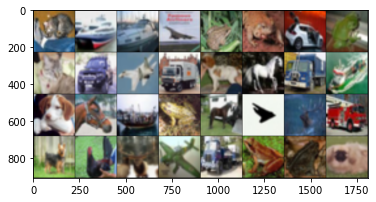

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))


In [ ]:
PATH = "./VGG16_Cifar_11.pth"

net = VGG16()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [50]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [51]:
print("Correct: ", correct)
print("Total: ", total)

Correct:  8451
Total:  10000
